# **Movie Recommendation System**

Recommender systems encompass a class of techniques and algorithms that can suggest “relevant” items to users. They predict future behavior based on past data through a multitude of techniques including matrix factorization.

## **Why Do We Need Recommender Systems?**
We now live in what some call the “era of abundance”. For any given product, there are sometimes thousands of options to choose from. Think of the examples above: streaming videos, social networking, online shopping; the list goes on. Recommender systems help to personalize a platform and help the user find something they like.

The easiest and simplest way to do this is to recommend the most popular items. However, to really enhance the user experience through personalized recommendations, we need dedicated recommender systems.

From a business standpoint, the more relevant products a user finds on the platform, the higher their engagement. This often results in increased revenue for the platform itself. Various sources say that as much as 35–40% of tech giants’ revenue comes from recommendations alone.

# **Types of Recommendation Systems**

**A) Content-Based Movie Recommendation Systems**

Content-based methods are based on the similarity of movie attributes. Using this type of recommender system, if a user watches one movie, similar movies are recommended. For example, if a user watches a comedy movie starring Adam Sandler, the system will recommend them movies in the same genre or starring the same actor, or both. With this in mind, the input for building a content-based recommender system is movie attributes.

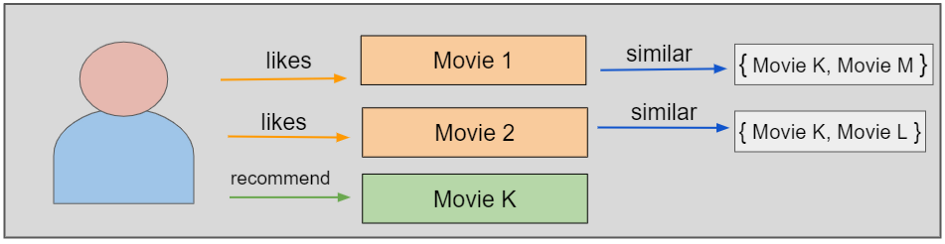

**B) Collaborative Filtering Movie Recommendation Systems:**

With collaborative filtering, the system is based on past interactions between users and movies. With this in mind, the input for a collaborative filtering system is made up of past data of user interactions with the movies they watch.

For example, if user A watches M1, M2, and M3, and user B watches M1, M3, M4, we recommend M1 and M3 to a similar user C. You can see how this looks in the figure below for clearer reference.

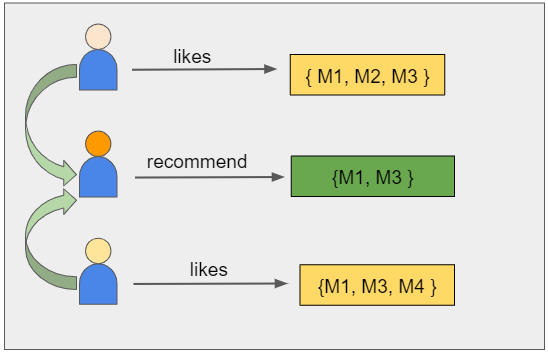


# **The Dataset:** 

For our own system, we’ll use the open-source MovieLens dataset from GroupLens. This dataset contains 100K data points of various movies and users.

We will use three columns from the data:
- userId
- movieId
- rating

Link: https://grouplens.org/datasets/movielens/


# **Implementation - Exploratory Data Analysis** 

**Importing libraries**

In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

**Imported 3 files from the movielens dataset as data frames**
- u.data
- u.item
- u.user

In [ ]:
u_cols = ['Userid','Age','Gender','Occupation','Zip code']
users = pd.read_csv('u.user', names = u_cols, sep = '|')
users.head()

,Userid,Age,Gender,Occupation,Zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
users.isna().apply(pd.value_counts) #missing value check

,Userid,Age,Gender,Occupation,Zip code
False,943,943,943,943,943


In [ ]:
ratings = pd.read_csv('u.data', sep = '\t', names= ['UseID', 'ItemID', 'rating', 'Timestamp'])
print(ratings.shape)
ratings.head(20)

(100000, 4)


,UseID,ItemID,rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   UseID      100000 non-null  int64
 1   ItemID     100000 non-null  int64
 2   rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
ratings.isna().apply(pd.value_counts) #missing value check

,UseID,ItemID,rating,Timestamp
False,100000,100000,100000,100000


In [ ]:
col_n = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']


movies = pd.read_csv('u.item', sep = '|', encoding = 'latin-1', names = col_n )
print(movies.shape)
movies.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [ ]:
# Dropping irrelevant columns
movies.drop(columns= ['video release date', 'IMDb URL'], inplace = True)  #drop unnecessary columns 

In [ ]:
# looking at the counts of individual genres
l = []

for i in movies.loc[:,'unknown' : 'Western'].columns:
    b = movies[i].value_counts()[1]
    l.append(b)

# Create a new Dataframe and assign the genre values 
genre_df = pd.DataFrame()
genre_df['Genre'] = movies.loc[:,'unknown' : 'Western'].columns
genre_df['Counts'] = l
genre_df

,Genre,Counts
0,unknown,2
1,Action,251
2,Adventure,135
3,Animation,42
4,Children's,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


In [ ]:
#the unknown column has only 2 entries. let's look at them
#filter in pandas to choose only movies for which unknown is 1 (or True)
#execution happens from right to left
movies[movies['unknown']== 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#let's see if there is information about the movieid 1373
ratings[ratings.ItemID == 1373]

,UseID,ItemID,rating,Timestamp
8567,181,1373,1,878962052


In [ ]:
# Since there is unknown column doesnt have a lot of info and the only movie associated with it was rated only once
movies.drop(movies[movies['unknown'] == 1].index, axis=0, inplace=True)
movies.drop(columns= 'unknown',inplace=True)

In [ ]:
movies.isna().apply(pd.value_counts)  #missing value check

,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680


In [ ]:
#read the u.user data and name the columns as per the Readme document in the folder
users = pd.read_csv('u.user', sep = '|', names= ['UserID',  'Age', 'Gender', 'Occupation', 'Zip-code'])
print(users.shape)
users.head()

(943, 5)


,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


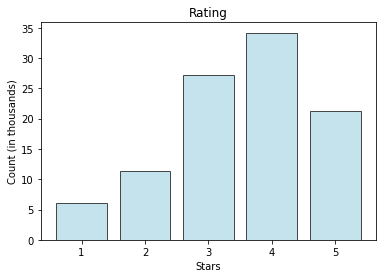

In [ ]:
#Univariate plots of columns: 'rating', 'Age', 'release date', 'Gender' and 'Occupation'

# Bar chart to view distribution of ratings accross all movies
x = ratings.rating.value_counts().index    #Values for x-axis
y = [ratings['rating'].value_counts()[i]/1000 for i in x]   #count(in thousands) on y-axis to plot in a neat manner 

# Other plot customizations
# For more use the link - https://matplotlib.org/contents.html
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black', alpha = 0.7)  #plot a bar chart
plt.xlabel('Stars')
plt.ylabel('Count (in thousands)')
plt.title('Rating')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


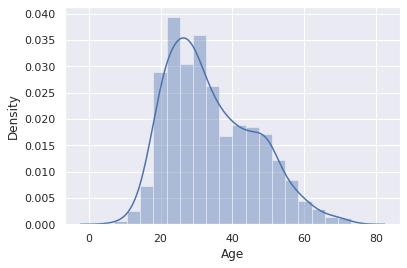

In [ ]:
# Distribution of age 
sns.set()    #setting seaborn style to default
sns.distplot(users.Age)
plt.show()

In [ ]:
# Example line of what will happen below. 
# For every value in release date, we convert to a string and split by -. 1 st value will be data, then month and finally year
movies['release date'].head(1).str.split("-")[0][2]

'1995'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


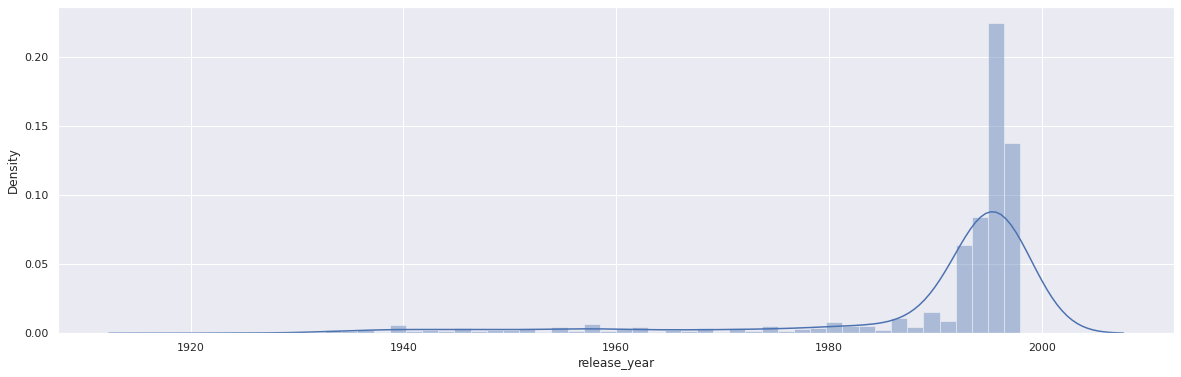

In [ ]:
# Distribution of movies w.r.t release year
movies['release_year'] = movies['release date'].str.split('-', expand = True)[2]  #seperating out the year from the date
movies['release_year'] = movies.release_year.astype(int)  # changing the type to int
plt.figure(figsize=(20,6))    #increasing the figure size
sns.distplot(movies.release_year)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


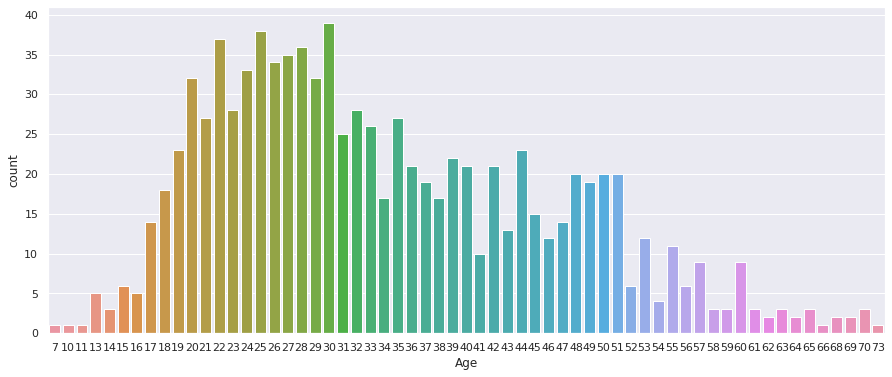

In [ ]:
plt.figure(figsize = (15, 6))
sns.countplot(users.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


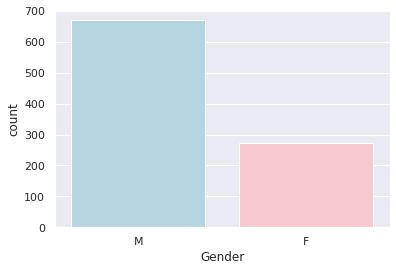

In [ ]:
#Gender distribution

sns.countplot(users.Gender, palette=['lightblue','pink'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


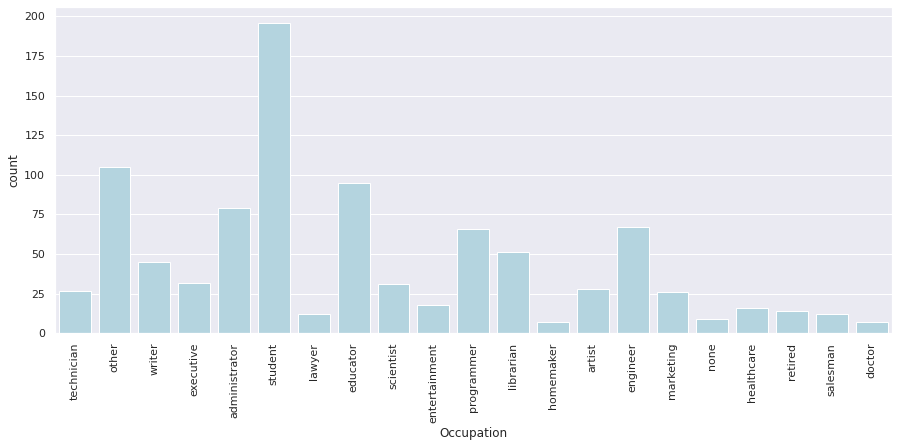

In [ ]:
#Distribution of users w.r.t population

plt.figure(figsize=(15,6)) # Customizing to show the plot neatly

sns.countplot(users.Occupation, color= 'lightblue')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Visualize how popularity of genres has changed over the years.

In [ ]:
genre_by_year = movies.groupby('release_year').sum()
#genre_by_year

In [ ]:
genre_by_year = movies.groupby('release_year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

release_year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,1,2,2,6,1,1,2,0,5,3,2,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,2,0,0,1,2,0,2,0,1,1,4,1,0,1,0,3,2,2,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,2,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,0,2,2,1,0,0,0,1,0,0,0,1,2,1,0,0,1,0,0,1,0,1,2,1,0,1,1,1,0,0,1,1,1,2,0,0,1,2,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,1,2,3,0,1,1,1,0,0,0,0,0,1,0,1,2,2,1,1,2,1,3,2,0,0,1,1,3,0,1,0,2,1,3,1,2,4,1,0,1,2,3,3,2,3,1,1,3,3,8,3,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,1,5,0,3,2,1,0,1,3,1,0,2,3,2,0,0,3,3,2,5,4,1,2,2,2,1,0,1,1,5,2,0,1,1,2,2,2,1,2,0,1,3,3,2,6,1,5,3,8,5,3,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,0,2,2,2,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,2,2


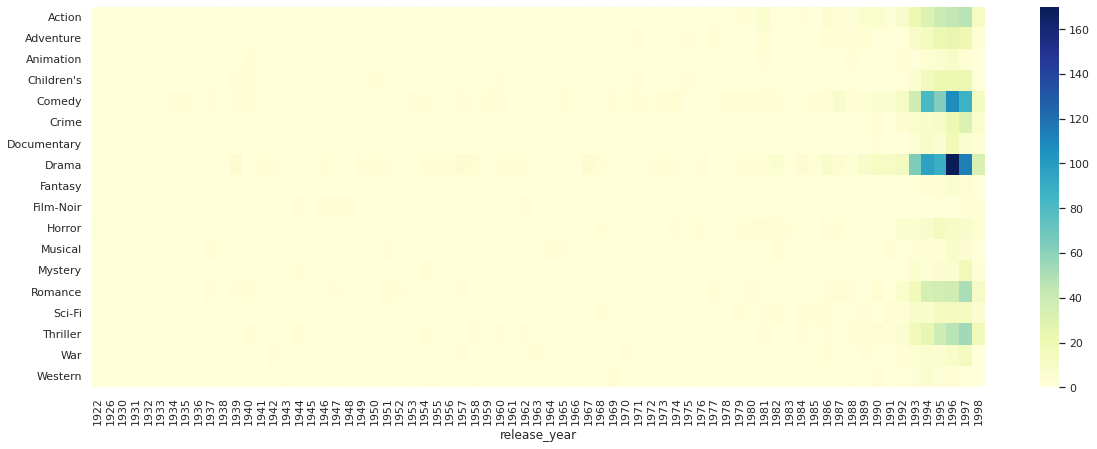

In [ ]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

Find the top 25 movies, each having a minimum of 100 ratings.

In [ ]:
items = ratings.groupby('ItemID').count()
items.head()

,UseID,rating,Timestamp
ItemID,,,
1,452,452,452
2,131,131,131
3,90,90,90
4,209,209,209
5,86,86,86


In [ ]:
items = ratings.groupby('ItemID').count()

items = items[ratings.groupby('ItemID').count().UseID > 100].index

items = ratings.loc[ratings.ItemID.isin(items)]

items = items.groupby('ItemID').mean()

items = items.sort_values('rating',ascending = False)

order = items.index

In [ ]:
rating_list = items.rating[0:25]

In [ ]:
movies.columns
items = movies.loc[movies['movie id'].isin(order)]

In [ ]:
top_25_movies = items.set_index('movie id').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]

In [ ]:
top_25_movies = top_25_movies.reset_index()

In [ ]:
top_25_movies['avg_rating'] =  rating_list.values

See gender distribution across different genres Verify the following:

- Men watch more drama than women
- Women watch more Sci-Fi than men
- Men watch more Romance than women

In [ ]:
movies.columns  # columns of movies dataframe

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [ ]:
users.columns   #columns of users dataframe

Index(['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code'], dtype='object')

In [ ]:
ratings.columns  # columns of ratings dataframe

Index(['UseID', 'ItemID', 'rating', 'Timestamp'], dtype='object')

In [ ]:
ratings.rename(columns= {'UseID' : 'UserID'}, inplace = True)  
#Renaming the column to have the same column name so that we can perform join operation

In [ ]:
result = pd.merge(ratings, users, how = 'inner', on = 'UserID')  #merging dataframes with UserID as the key

In [ ]:
movies.rename(columns= {'movie id' : 'ItemID'}, inplace= True)
#Renaming the column to have the same column name so that we can perform join operation

In [ ]:
result = pd.merge(result, movies, how='inner', on='ItemID')  # merging dataframes with ItemID as the key

In [ ]:
result.head()   

,UserID,ItemID,rating,Timestamp,Age,Gender,Occupation,Zip-code,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997


In [ ]:
Genre_by_gender = result.groupby('Gender').sum().loc[:,'Action':'Western']  #Group by gender and aggregate with sum and select all the genre columns 

In [ ]:
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)  #Row total of the dataframe

In [ ]:
Genre_by_gender

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In absolute numbers,

- Men watch more drama than women - True, 28887 men watch more drama as compared to 11008 woman
- Men watch more Romance than women - True, 13603 men watch more romance than 5858 woman
- Women watch more Sci-Fi than men - False, 2629 woman watch less Sci-Fi as compared to 10101 men

In [ ]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100  #dividing each cell with row total and multiplying by 100

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


Conclusion: In Percentages

- Of all the women, 20% watched Drama and of all the men, 18% watched Drama
- Of all men, 8% watched romance whereas nearly 10% of woman have watched romance.
- Of all the women, 4.8% watched Sci-Fi and of all the men, 6.3% watched Sci-Fi

# **Content-based Filtering**

The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Reading ratings file
df_ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
df_movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [ ]:
# Define a TF-IDF Vectorizer Object
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")


tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])

cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)


In [ ]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):
    """
    Calculates top 2 movies to recommend based on given movie titles genres. 
    :param movie_title: title of movie to be taken for base of recommendation
    :param cosine_sim_movies: cosine similarity between movies 
    :return: Titles of movies recommended to user
    """
    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:3]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Return the top 2 most similar movies
    return df_movies['title'].iloc[movie_indices]

In [ ]:
get_recommendations_based_on_genres("Father of the Bride Part II (1995)")

17                        Four Rooms (1995)
18    Ace Ventura: When Nature Calls (1995)
Name: title, dtype: object

In [ ]:
def get_recommendation_content_model(userId):
    """
    Calculates top movies to be recommended to user based on movie user has watched.  
    :param userId: userid of user
    :return: Titles of movies recommended to user
    """
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)
get_recommendation_content_model(1)

{'101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '39 Steps, The (1935)',
 'Ace Ventura: When Nature Calls (1995)',
 'Adventures in Babysitting (1987)',
 'Adventures of Robin Hood, The (1938)',
 'Alamo, The (1960)',
 'Alien Nation (1988)',
 'Amateur (1994)',
 'Amazing Panda Adventure, The (1995)',
 "Antonia's Line (Antonia) (1995)",
 'Antz (1998)',
 'Aristocats, The (1970)',
 'Around the World in 80 Days (1956)',
 'Assassins (1995)',
 'Austin Powers: The Spy Who Shagged Me (1999)',
 'BURN-E (2008)',
 'Babes in Toyland (1934)',
 'Backbeat (1993)',
 'Barb Wire (1996)',
 'Batman: Mystery of the Batwoman (2003)',
 'Beat the Devil (1953)',
 'Before the Rain (Pred dozhdot) (1994)',
 'Ben-Hur (1959)',
 'Big Bully (1996)',
 'Big Country, The (1958)',
 'Big Trouble in Little China (1986)',
 'Black Hole, The (1979)',
 'Blazing Saddles (1974)',
 'Blues Brothers 2000 (1998)',
 'Boot, Das (Boat, The) (1981)',
 'Bride of Frankenstein, The (Bride of Frankenstein) (1935)',
 'Broken Arrow (19

# **Model Evaluation with kNN**

Here the model is evaluated on based of if there is exact match of genres with the genres of movie which is already watch by user. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
def get_movie_label(movie_id):
    """
    Get the cluster label to which movie belongs by KNN algorithm.  
    :param movie_id: movie id
    :return: genres label to movie belong
    """
    classifier = KNeighborsClassifier(n_neighbors=5)
    x= tfidf_movies_genres_matrix
    y = df_movies.iloc[:,-1]
    classifier.fit(x, y)
    y_pred = classifier.predict(tfidf_movies_genres_matrix[movie_id])
    return y_pred

In [ ]:
true_count = 0
false_count = 0
def evaluate_content_based_model():
    """
    Evaluate content based model.  
    """
    for key, colums in df_movies.iterrows():
        movies_recommended_by_model = get_recommendations_based_on_genres(colums["title"])
        predicted_genres  = get_movie_label(movies_recommended_by_model.index)
        for predicted_genre in predicted_genres:
            global true_count, false_count
            if predicted_genre == colums["genres"]:
                true_count = true_count+1
            else:
                false_count = false_count +1
evaluate_content_based_model()
total = true_count + false_count
print("Hit:"+ str(true_count/total))
print("Fault:" + str(false_count/total))

Hit:0.9325087251077807
Fault:0.06749127489221926
